In [1]:
from data import *
import matplotlib.pyplot as plt
%matplotlib inline
from loss import *

from torch import nn
from torch.autograd import Variable
from train import *

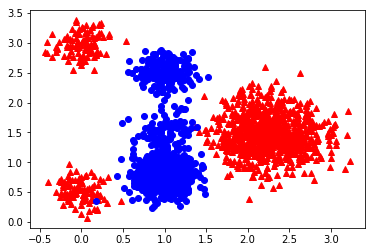

In [2]:
# create training data 
p = pos()
n = neg()
XY,x,y = getXY(p,n)
plot(p,n)

In [3]:
# Train simple model with hinge loss
num_epochs = 600
learning_rate = 0.1
f = nn.Sequential(nn.Linear(2,1))#, nn.Tanh())
criterion = HingeLoss()
criterion = RatP()
train(f, criterion, x, y)

0.9055927991867065
0.7076085805892944
0.5463782548904419
0.49330151081085205
0.48520800471305847
0.4832889437675476
0.48282095789909363
0.4827013313770294
0.4826599061489105
0.4826502501964569


In [31]:
PP = []
RR = []
F = []
G = []
a = 0.3
for x1 in torch.linspace(-4,4,100):
    for x2 in torch.linspace(-4,4,100):
        f[0].weight.data[0][0] = 1
        f[0].weight.data[0][1] = (x1-x2)/4.0 
        f[0].bias.data[0] = -x1
        PP.append(Pl(f(x),y).data[0])
        RR.append(Rl(f(x),y).data[0])
        F.append(RatPf(f(x),y).data[0])
        G.append(RatPg(f(x),y,a).data[0])
        #break

In [35]:
GG = np.array(G)
FF = np.array(F)

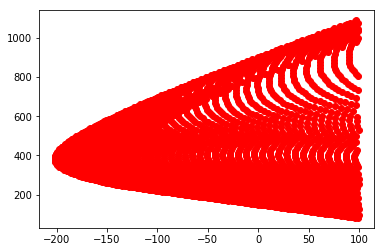

In [41]:
plt.plot(GG[GG<100],FF[GG<100],'ro')

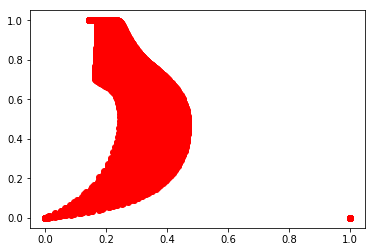

In [42]:
plt.plot(torch.Tensor(PP).clamp(0,1).numpy(),torch.Tensor(RR).clamp(0,1).numpy(),'ro')

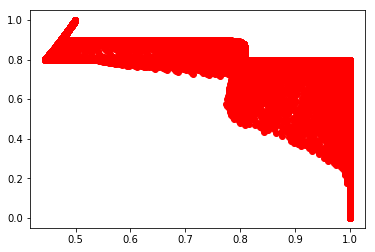

In [100]:
plt.plot(PP,RR,'ro')

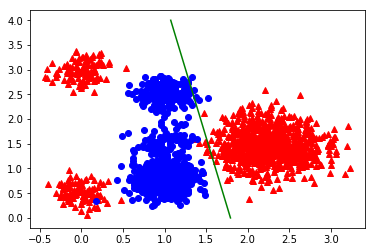

In [4]:
plotf(p,n,f[0])